In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

import os
import datetime
%load_ext tensorboard
from skimage import color, exposure
from sklearn.metrics import accuracy_score

In [3]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three


In [4]:
cd dw_matrix_road_sign/

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [5]:
ls

data/  day2_matrix3.ipynb  Day3_matrix3.ipynb  LICENSE  logs/  README.md


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


In [0]:
df=pd.read_csv('data/signnames.csv')
labels_dict=df.to_dict()['b']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape=X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
def gen_cnn_vl(input_shape, num_classes):
  return  Sequential([
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

  Flatten(),

  Dense(num_classes, activation='softmax'),
  ])

def train_model(model, X_train, y_train,params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])
    
  logdir= os.path.join("logs", datetime.datetime.now().strftime("Y%m%d-%D%M%S")) #siceżka do katlogu z logami
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1) 

  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128), #dzielenie danych na paczki 
      epochs=params_fit.get('epochs', 5),
      verbose= params_fit.get('verbose', 1), #wypisanie stanu
      validation_data=params_fit.get('validation_data', (X_train,y_train)),
      callbacks=[tensorboard_callback] 
  )

  return model

In [11]:
model=gen_cnn_vl(input_shape, num_classes)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_trained_1 = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 33.2033 - accuracy: 0.7373 - val_loss: 0.2726 - val_accuracy: 0.9386
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2576 - accuracy: 0.9401 - val_loss: 0.1720 - val_accuracy: 0.9577
Epoch 3/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1700 - accuracy: 0.9595 - val_loss: 0.1112 - val_accuracy: 0.9737
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1189 - accuracy: 0.9719 - val_loss: 0.0853 - val_accuracy: 0.9788
Epoch 5/5
272/272 [==============================] - 4s 17ms/step - loss: 0.1252 - accuracy: 0.9713 - val_loss: 0.1665 - val_accuracy: 0.9639


In [0]:
y_pred_prob = model_trained_1.predict(X_test)

In [14]:
y_pred_prob[400] #prodopodobienstwo wyst pierwszego znaku

array([9.0821856e-01, 1.7404359e-02, 4.5036114e-04, 6.6162535e-08,
       4.7590125e-02, 2.1175786e-07, 9.3465164e-19, 1.4524459e-10,
       3.2353625e-10, 4.4863210e-03, 1.0082656e-11, 1.9618364e-11,
       5.6881970e-22, 9.0715361e-07, 1.9367553e-11, 2.1837389e-02,
       1.1827853e-05, 7.6117031e-23, 9.5443309e-17, 3.3747959e-26,
       4.6099027e-12, 7.4242988e-15, 3.1989431e-22, 3.2782293e-14,
       2.1011419e-18, 4.3621012e-10, 3.4010374e-11, 3.0802081e-23,
       7.3961659e-13, 1.6419835e-10, 1.2783282e-23, 7.4581563e-13,
       2.3795260e-10, 0.0000000e+00, 0.0000000e+00, 3.4328961e-21,
       2.2634544e-37, 0.0000000e+00, 1.2845251e-25, 0.0000000e+00,
       0.0000000e+00, 2.6766429e-22, 4.2999664e-24], dtype=float32)

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred= np.argmax(y_pred_prob, axis=1) #np.argmaxindex max wartości

  return accuracy_score(y_test_norm, y_pred)

In [16]:
predict(model_trained_1, X_test, y_test)

0.7970521541950113

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [18]:
def gen_cnn_v2(input_shape, num_classes):
  return  Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  MaxPool2D(),
  Dropout(0.3), #dropout zpobiega przseuczaniu
  

  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax'),
  ])

train_and_predict(gen_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 7.3538 - accuracy: 0.1501 - val_loss: 2.5365 - val_accuracy: 0.3273
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 2.0495 - accuracy: 0.4270 - val_loss: 1.0687 - val_accuracy: 0.7144
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 1.1693 - accuracy: 0.6521 - val_loss: 0.4983 - val_accuracy: 0.8858
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.7383 - accuracy: 0.7793 - val_loss: 0.2951 - val_accuracy: 0.9374
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.4795 - accuracy: 0.8548 - val_loss: 0.1513 - val_accuracy: 0.9698


0.8927437641723356

In [19]:
def gen_cnn_v3(input_shape, num_classes):
  return  Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  MaxPool2D(),
  Dropout(0.3), #dropout zpobiega przseuczaniu
  

  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax'),
  ])

#gen_cnn_v3(input_shape, num_classes).summary()
train_and_predict(gen_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 19ms/step - loss: 3.5969 - accuracy: 0.3187 - val_loss: 0.8176 - val_accuracy: 0.7918
Epoch 2/5
272/272 [==============================] - 5s 18ms/step - loss: 0.8461 - accuracy: 0.7514 - val_loss: 0.2264 - val_accuracy: 0.9510
Epoch 3/5
272/272 [==============================] - 5s 18ms/step - loss: 0.4188 - accuracy: 0.8742 - val_loss: 0.0863 - val_accuracy: 0.9798
Epoch 4/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2624 - accuracy: 0.9221 - val_loss: 0.0629 - val_accuracy: 0.9819
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1864 - accuracy: 0.9431 - val_loss: 0.0434 - val_accuracy: 0.9901


0.9519274376417234

In [20]:
def gen_cnn_v4(input_shape, num_classes):
  return  Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape,padding='same'),
  MaxPool2D(),
  Dropout(0.3), #dropout zpobiega przseuczaniu
  

  Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax'),
  ])

#gen_cnn_v4(input_shape, num_classes).summary()
train_and_predict(gen_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 6s 22ms/step - loss: 2.4185 - accuracy: 0.3382 - val_loss: 0.8238 - val_accuracy: 0.7821
Epoch 2/5
272/272 [==============================] - 6s 21ms/step - loss: 0.7613 - accuracy: 0.7681 - val_loss: 0.1664 - val_accuracy: 0.9520
Epoch 3/5
272/272 [==============================] - 6s 21ms/step - loss: 0.3496 - accuracy: 0.8909 - val_loss: 0.0681 - val_accuracy: 0.9792
Epoch 4/5
272/272 [==============================] - 6s 21ms/step - loss: 0.2350 - accuracy: 0.9280 - val_loss: 0.0529 - val_accuracy: 0.9868
Epoch 5/5
272/272 [==============================] - 6s 21ms/step - loss: 0.1806 - accuracy: 0.9464 - val_loss: 0.0462 - val_accuracy: 0.9869


0.9653061224489796

In [21]:
def gen_cnn_v5(input_shape, num_classes):
  return  Sequential([
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape,padding='same'),
  MaxPool2D(),
  Dropout(0.3), #dropout zpobiega przseuczaniu
  

  Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax'),
  ])

#gen_cnn_v4(input_shape, num_classes).summary()
train_and_predict(gen_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.7041 - accuracy: 0.2712 - val_loss: 1.0279 - val_accuracy: 0.6972
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.9040 - accuracy: 0.7115 - val_loss: 0.2813 - val_accuracy: 0.9300
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.4331 - accuracy: 0.8636 - val_loss: 0.0941 - val_accuracy: 0.9719
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2836 - accuracy: 0.9122 - val_loss: 0.0613 - val_accuracy: 0.9804
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2056 - accuracy: 0.9394 - val_loss: 0.0371 - val_accuracy: 0.9894


0.9639455782312926

In [22]:
color.rgb2gray(X_train[0]).shape # konwersja do skali szarości

(32, 32)

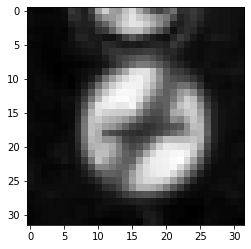

In [24]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

In [0]:
X_train_gray=color.rgb2gray(X_train).reshape(-1, 32, 32,1)
X_test_gray=color.rgb2gray(X_test).reshape(-1, 32, 32,1)

In [29]:
model = gen_cnn_v5((32,32,1), num_classes)
model_trained=train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray,y_test)

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.3891 - accuracy: 0.3291 - val_loss: 0.5280 - val_accuracy: 0.8360
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.4496 - accuracy: 0.8544 - val_loss: 0.0902 - val_accuracy: 0.9757
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2053 - accuracy: 0.9349 - val_loss: 0.0448 - val_accuracy: 0.9864
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1370 - accuracy: 0.9563 - val_loss: 0.0284 - val_accuracy: 0.9918
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1053 - accuracy: 0.9672 - val_loss: 0.0222 - val_accuracy: 0.9948


0.9766439909297052

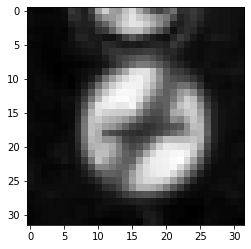

In [30]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))